In [1]:
from pandas import read_csv
import numpy as np
import pandas as pd

In [2]:
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
from sklearn.svm import SVC
from sklearn.model_selection  import train_test_split

In [3]:
filename=pd.read_csv("Zoo.csv")

In [4]:
filename1=filename.copy()

In [5]:
filename1.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
labelencoder=LabelEncoder()

In [7]:
filename1.iloc[:,-1]=labelencoder.fit_transform(filename1.iloc[:,-1])

In [8]:
filename1.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,0
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,3
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,0


In [9]:
filename1.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,0
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,5
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,0
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,6
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,1


# One Hot Encoder

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
filename2=filename1.copy()

In [12]:
filename2.drop(["animal name"],inplace=True,axis=1)

In [13]:
filename2.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,3
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,0


In [14]:
names=['hair','feathers','eggs','milk','airbone','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tails','domestic','catsize','type']

In [15]:
filename2.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [18]:
array=filename2.values
X=array[:,0:16]
Y=array[:,16]

In [19]:
num_folds=10
kfold=KFold(n_splits=10)

In [20]:
model=KNeighborsClassifier(n_neighbors=17)
result=cross_val_score(model,X,Y,cv=kfold)

In [22]:
print(result.mean())

0.76


# Grid search Fr Algorithm Tunning 

In [25]:
#Grid Search for Algorithm Tunning
import numpy
from sklearn.model_selection import GridSearchCV

In [26]:
n_neighbors=numpy.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)

In [27]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [28]:
print(grid.best_score_)
print(grid.best_params_)

0.96
{'n_neighbors': 1}


# Visualizing the CV resuls

In [29]:
# Choose k between 1 to 41
k_range=range(1,41)
k_score=[]

In [30]:
# Use iteration to calculator different k in models,then return the average accuracy based on the cross on the cross validation
for k in k_range:
    KNN=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(KNN,X,Y,cv=5)
    k_score.append(scores.mean())

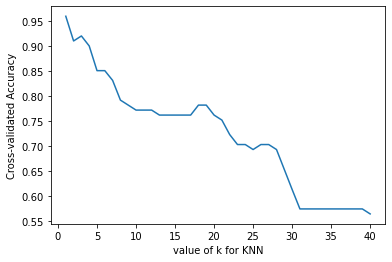

In [34]:
#Plot to see clearly
plt.plot(k_range,k_score)
plt.xlabel('value of k for KNN')
plt.ylabel('Cross-validated Accuracy')
plt.show()